# Project 1: DQN for Unity Environment

---

In this notebook, we learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## Start the Environment

We begin by importing some necessary packages. 

Check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md)


In [1]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
from collections import deque

import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


## DQN Training

In [5]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=200)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0] or env.global_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

In [6]:
def train_dqn():
    scores = dqn(n_episodes=2000)
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

### Vanilla DQN

Episode 100	Average Score: 1.12
Episode 200	Average Score: 2.62
Episode 300	Average Score: 5.55
Episode 400	Average Score: 8.55
Episode 500	Average Score: 11.38
Episode 600	Average Score: 13.63
Episode 700	Average Score: 14.68
Episode 800	Average Score: 15.18
Episode 900	Average Score: 15.73
Episode 1000	Average Score: 15.98
Episode 1100	Average Score: 16.12
Episode 1200	Average Score: 16.07
Episode 1300	Average Score: 15.93
Episode 1400	Average Score: 15.56
Episode 1500	Average Score: 15.43
Episode 1600	Average Score: 14.95
Episode 1700	Average Score: 15.27
Episode 1800	Average Score: 15.69
Episode 1900	Average Score: 15.42
Episode 2000	Average Score: 15.20


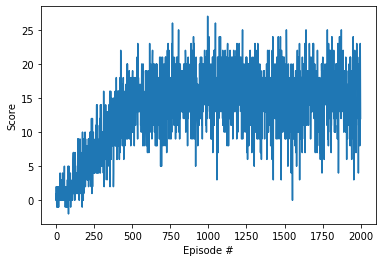

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=False, priority_replay=False)
train_dqn()

### Double DQN

Episode 100	Average Score: 0.70
Episode 200	Average Score: 1.59
Episode 300	Average Score: 4.67
Episode 400	Average Score: 8.28
Episode 500	Average Score: 11.38
Episode 600	Average Score: 13.88
Episode 700	Average Score: 15.07
Episode 800	Average Score: 15.47
Episode 900	Average Score: 15.48
Episode 1000	Average Score: 15.94
Episode 1100	Average Score: 16.57
Episode 1200	Average Score: 16.79
Episode 1300	Average Score: 16.70
Episode 1400	Average Score: 15.99
Episode 1500	Average Score: 15.96
Episode 1600	Average Score: 16.05
Episode 1700	Average Score: 15.62
Episode 1800	Average Score: 15.74
Episode 1900	Average Score: 15.52
Episode 2000	Average Score: 15.38


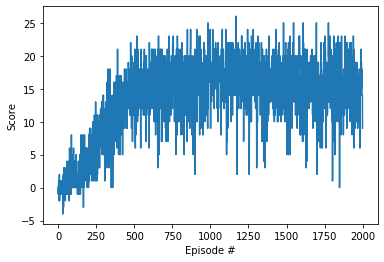

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, priority_replay=False)
train_dqn()

### Double DQN + Priority Replay

In [9]:
# agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=False, priority_replay=True)
# train_dqn()

### Dueling DQN

Episode 100	Average Score: 0.73
Episode 200	Average Score: 1.50
Episode 300	Average Score: 3.98
Episode 400	Average Score: 7.30
Episode 500	Average Score: 9.82
Episode 600	Average Score: 11.73
Episode 700	Average Score: 12.63
Episode 800	Average Score: 12.48
Episode 900	Average Score: 11.90
Episode 1000	Average Score: 11.78
Episode 1100	Average Score: 12.48
Episode 1200	Average Score: 12.94
Episode 1300	Average Score: 13.02
Episode 1400	Average Score: 13.10
Episode 1500	Average Score: 13.66
Episode 1600	Average Score: 13.72
Episode 1700	Average Score: 12.23
Episode 1800	Average Score: 12.11
Episode 1900	Average Score: 13.15
Episode 2000	Average Score: 13.35


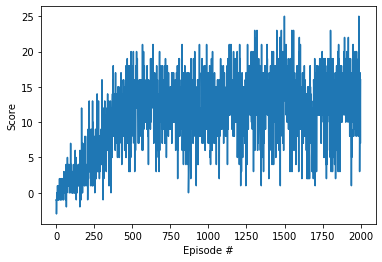

In [10]:
from model import DuelingQNetwork

agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, priority_replay=True, q_network=DuelingQNetwork)
train_dqn()

### Dueling + Double DQN + Priority Replay (Rainbow)

In [11]:
# from model import DuelingQNetwork
# agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, priority_replay=True, q_network=DuelingQNetwork)
# train_dqn()

In [ ]:
env